# kneed -- knee detection in Python

For the purposes of the walkthrough, import `DataGenerator` to create simulated datasets.  
In practice, the `KneeLocator` class will be used to identify the knee point.

In [1]:
%matplotlib inline

from kneed.data_generator import DataGenerator
from kneed.knee_locator import KneeLocator

import numpy as np

In [2]:
np.random.seed(23) # only for the walkthrough

In [3]:
DG = DataGenerator()
x,y = DG.noisy_gaussian(N=1000)

In [4]:
x[:5],y[:5]

(array([ 24.14475503,  24.92443938,  24.93769683,  25.37559952,  25.45830214]),
 array([ 0.   ,  0.001,  0.002,  0.003,  0.004]))

The knee is located by passing `x` and `y` values to `knee_locator`.  
`S` is the sensitivity parameter  
`invert`=True when the graph has negative concavity.

In [5]:
kneedle = KneeLocator(x, y, S=1.0, invert=False)

In [6]:
kneedle.knee

60.763851270368505

In [7]:
kneedle.knee_x

880

There are plotting functions to visualize the knee point on the raw data and the normalized data.

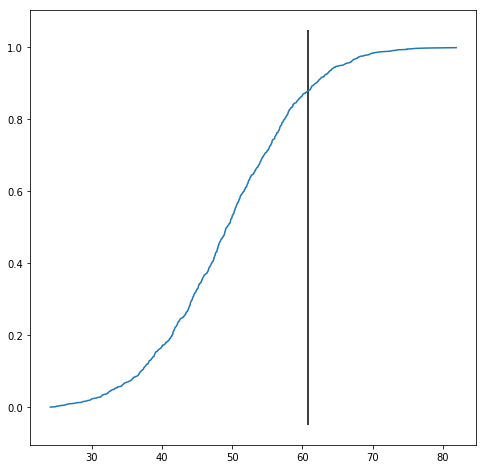

In [8]:
kneedle.plot_knee()

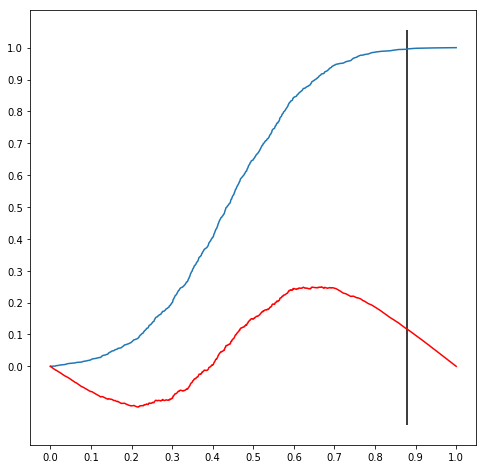

In [9]:
kneedle.plot_knee_normalized()

## Average Knee for NoisyGaussian from 5000 random iterations

In [10]:
knees = []
for i in range(5000):
    x,y = DG.noisy_gaussian(N=1000)
    kneedle = KneeLocator(x,y)
    knees.append(kneedle.knee)

In [11]:
np.mean(knees)

60.921051806064931

# Test all type of functions

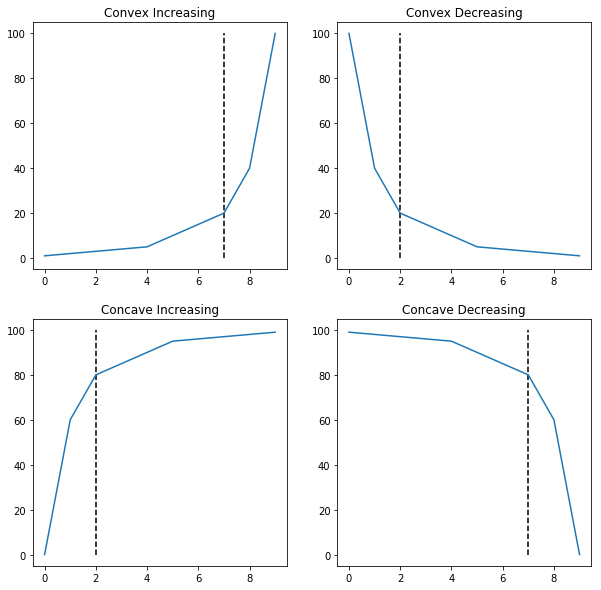

In [11]:
x = np.arange(0,10)
y_convex_inc = np.array([1,2,3,4,5,10,15,20,40,100])
y_convex_dec = y_convex_inc[::-1]
y_concave_dec = 100 - y_convex_inc
y_concave_inc = 100 - y_convex_dec

kn = KneeLocator(x, y_convex_inc, curve='convex')
knee_yconvinc = kn.knee

kn = KneeLocator(x, y_convex_dec, curve='convex', direction='decreasing')
knee_yconvdec = kn.knee

kn = KneeLocator(x, y_concave_inc, curve='concave')
knee_yconcinc = kn.knee

kn = KneeLocator(x, y_concave_dec, curve='concave', direction='decreasing')
knee_yconcdec = kn.knee

f, axes = plt.subplots(2, 2, figsize=(10,10));
yconvinc = axes[0][0]
yconvdec = axes[0][1]
yconcinc = axes[1][0]
yconcdec = axes[1][1]

sns.lineplot(x, y_convex_inc, ax=axes[0][0])
yconvinc.vlines(x=knee_yconvinc, ymin=0, ymax=100, linestyle='--')
yconvinc.set_title('Convex Increasing')

sns.lineplot(x, y_convex_dec, ax=axes[0][1])
yconvdec.vlines(x=knee_yconvdec, ymin=0, ymax=100, linestyle='--')
yconvdec.set_title('Convex Decreasing')

sns.lineplot(x, y_concave_inc, ax=axes[1][0])
yconcinc.vlines(x=knee_yconcinc, ymin=0, ymax=100, linestyle='--')
yconcinc.set_title('Concave Increasing')

sns.lineplot(x, y_concave_dec, ax=axes[1][1])
yconcdec.vlines(x=knee_yconcdec, ymin=0, ymax=100, linestyle='--')
yconcdec.set_title('Concave Decreasing');